In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("F:\Data\Experimental/Balancespam.csv", encoding = 'latin-1')

In [3]:
#data = data.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [4]:
data.head()

,fake,text
0,ham,"Hmm ok, i'll stay for like an hour cos my eye ..."
1,ham,"I'm in a meeting, call me later at"
2,ham,A little. Meds say take once every 8 hours. It...
3,ham,Am going to take bath ill place the key in win...
4,ham,Just sleeping..and surfing


In [14]:
data['fake'].value_counts()

spam    747
ham     747
Name: fake, dtype: int64

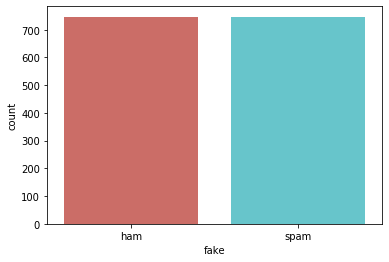

In [15]:
sns.countplot(x='fake', data = data, palette='hls')
#plt.savefig('spamcount')
plt.show()

In [3]:
Y_Train = data.fake
X_Train = data.drop(columns = 'fake')

In [4]:
df_data = data[["text","fake"]]

In [5]:
df_x = df_data['text']
df_y = df_data['fake']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
corpus = df_x
cv = CountVectorizer()
X = cv.fit_transform(corpus)

In [8]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
cv.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.33, random_state=42)

In [10]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9696356275303644

In [11]:
predict_y = clf.predict(X_test)
print('Accuracy of NB classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of NB classifier on test set: 0.97


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       245
        spam       0.99      0.95      0.97       249

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



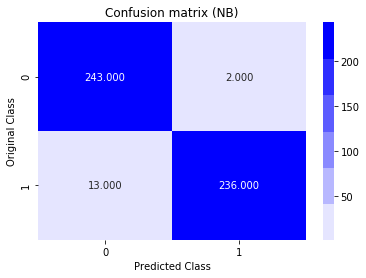

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
C = confusion_matrix(y_test, predict_y)
labels = [0,1]
cmap=sns.light_palette("blue")
sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix (NB)")
plt.savefig('spamNBMatrix')

In [14]:
comment = ["blah blah blah"]
vect = cv.transform(comment).toarray()

In [15]:
clf.predict(vect)

array(['ham'], dtype='<U4')

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
print('Accuracy of NB on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of NB on test set: 0.69


In [17]:
knnpredict_y = knn.predict(X_test)
print(classification_report(y_test, knnpredict_y))

              precision    recall  f1-score   support

         ham       0.61      1.00      0.76       245
        spam       0.99      0.39      0.55       249

    accuracy                           0.69       494
   macro avg       0.80      0.69      0.66       494
weighted avg       0.80      0.69      0.66       494



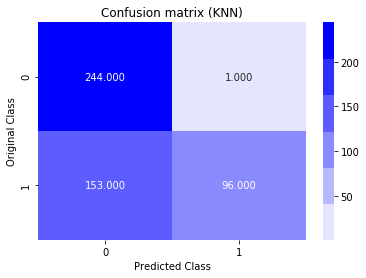

In [25]:
C = confusion_matrix(y_test, knnpredict_y)
labels = [0,1]
cmap=sns.light_palette("blue")
sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix (KNN)")
plt.savefig('spamKNNMatrix')

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [20]:
print('Accuracy of NB on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of NB on test set: 0.96


In [21]:
lrpredict_y = logreg.predict(X_test)
print(classification_report(y_test, lrpredict_y))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       245
        spam       0.99      0.93      0.96       249

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



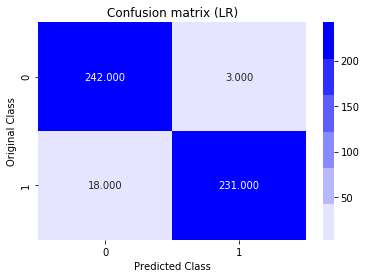

In [26]:
C = confusion_matrix(y_test, lrpredict_y)
labels = [0,1]
cmap=sns.light_palette("blue")
sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix (LR)")
plt.savefig('spamLRMatrix')